In [13]:
ls gz*.shp

gz_2010_09_140_00_500k.shp*  gz_2010_36_140_00_500k.shp*
gz_2010_34_140_00_500k.shp*


In [11]:
import pandas as pd
import geopandas as gpd
import glob

In [2]:
trips = pd.read_excel("EXCEL/UNLINKED_Public.xlsx")

In [5]:
pd.options.display.max_columns = None

In [14]:
tracts = pd.concat(gpd.read_file(f) for f in glob.glob("gz*.shp"))

In [25]:
state_by_tract = {"36": "NY",
                  "34": "NJ",
                  "09": "CT"}

tracts.head()

,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry,clean_geo
0,1400000US09001081000,09,001,081000,810,Tract,1.079,"POLYGON ((-73.148072 41.207792, -73.148517 41....",9001081000
1,1400000US09001081100,09,001,081100,811,Tract,1.312,"POLYGON ((-73.13677299999999 41.226965, -73.13...",9001081100
2,1400000US09001081300,09,001,081300,813,Tract,3.851,"POLYGON ((-73.126403 41.238872, -73.130459 41....",9001081300
3,1400000US09001090600,09,001,090600,906,Tract,3.184,"POLYGON ((-73.151591 41.252658, -73.1517899999...",9001090600
4,1400000US09001110100,09,001,110100,1101,Tract,0.306,"POLYGON ((-73.099355 41.32075, -73.097707 41.3...",9001110100


In [15]:
tracts["clean_geo"] = tracts.GEO_ID.apply(lambda x: int(x.split("US")[1]))

In [29]:
trips_with_destination = trips.merge(tracts, left_on="DTRACT", right_on="clean_geo", how="left",
                                     suffixes=("_d", "_d"))
trips_with_od = trips_with_destination.merge(tracts, left_on="OTRACT", right_on="clean_geo", how="left", 
                                             suffixes=("_o", "_d"))

In [35]:
len(trips_with_od[trips_with_od["TRP_DEP_HR"] < 5]

869

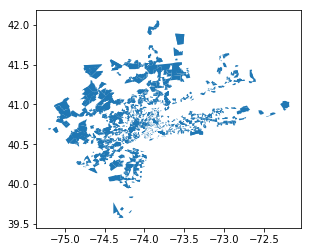

In [40]:
trips_with_od["geometry"] = trips_with_od["geometry_o"]
trips_o_geo = gpd.GeoDataFrame(trips_with_od)
trips_o_geo[trips_o_geo["TRP_DEP_HR"] < 6].plot()

In [66]:
manhattan_counties = {"061"}
def o_or_d(row):
    origin =  (row["COUNTY_o"] == "061")
    destination = (row["COUNTY_d"] == "061")
    if origin and not destination:
        return "start"
    if destination and not origin:
        return "end"
    if destination and origin:
        return "both"
    return "no"
trips_o_geo["start_or_end"] = trips_o_geo[["COUNTY_o", "COUNTY_d"]].apply(o_or_d, axis=1)

In [67]:
of_interest = trips_o_geo[((trips_o_geo["COUNTY_d"] == "061") | 
                  (trips_o_geo["COUNTY_o"] == "061")) &
                  (trips_o_geo["TRP_DEP_HR"] < 6)]

In [68]:
all_subway_trips = trips_o_geo[trips_o_geo["ULTMODE"] == 15]
interest_subway = of_interest[of_interest["ULTMODE"] == 15]
len(interest_subway) / float(len(all_subway_trips))

0.007646791078743742

/home/christian/.miniconda2/envs/datacourse/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/christian/.miniconda2/envs/datacourse/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


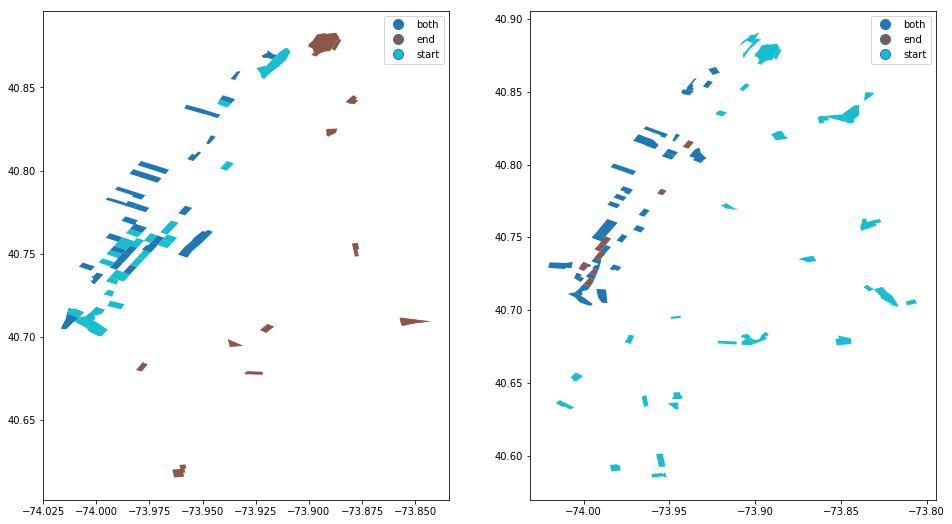

In [75]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,  2, figsize=(16, 9))
interest_subway["geometry"] = interest_subway["geometry_o"]
interest_subway.plot('start_or_end', categorical=True, legend=True, ax=axes[0])

interest_subway["geometry"] = interest_subway["geometry_d"]
interest_subway.plot('start_or_end', categorical=True, legend=True, ax=axes[1])

In [87]:
(interest_subway["start_or_end"].value_counts() / float(len(interest_subway)))

both     0.440476
start    0.416667
end      0.142857
Name: start_or_end, dtype: float64

In [7]:
import matplotlib
%matplotlib inline


In [25]:
areas_2010 = glob.glob("tl*.shp")
areas_2010

['tl_2011_36_taz10.shp', 'tl_2011_34_taz10.shp', 'tl_2011_09_taz10.shp']

In [26]:
things = [gpd.read_file(s) for s in areas_2010]
thing_1 = pd.concat(things)
gdfs_2010 = gpd.GeoDataFrame(thing_1)

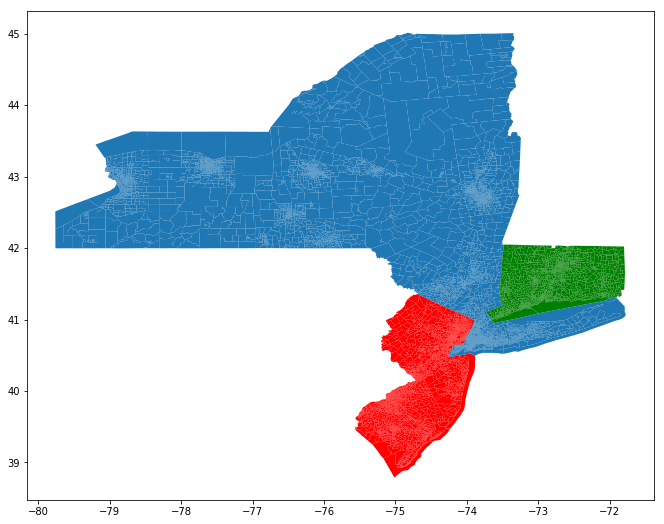

In [33]:
ax = things[1].plot(figsize=(16, 9), color='red')
ax = things[0].plot(ax=ax)
ax = things[2].plot(ax=ax, color='green')

In [39]:
things[0][things[0]["TAZCE10"].str.contains("2626")]

,STATEFP10,COUNTYFP10,MPOCE10,TADCE10,TAZCE10,GEOID10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry


In [35]:
trips.head()

,PLSAM,SAMPN,PERNO,PLANO,ORIG_HOME,GTYPE,HHSIZE,DHOME,TRIPNO,LTRIPNO,LINKFLAG,TOUR_ID,DOW,HTAZ,HTRACT,OTAZ,DTAZ,No_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPUR2,ULTMODE,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_ARR_HR,TRP_DEP_MIN,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID1,UNIQUEID2,HH1,HH_WHT2,TOURFAC,WHT_FAC3,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY
0,30000560102,3000056,1,2,1,2,6,0,1,1,1,1,3,2626,9001205100,2626,2627,0,3,24,0,9,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,7,7,29.0,36.0,7,59,1.17447,9001205100,9001205200,900108980,900108980,6804,6804,3000056010101,3000056010101,1510.0,1846.72807,1.156645,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
1,30000560103,3000056,1,3,0,2,6,1,2,2,2,1,3,2626,9001205100,2627,2626,0,24,3,9,0,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,0,0,0,0,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,8,8,35.0,42.0,7,235,1.17447,9001205200,9001205100,900108980,900108980,6804,6804,3000056010102,3000056010102,1510.0,1846.72807,1.156645,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
2,30000560104,3000056,1,4,1,2,6,0,1,1,1,2,3,2626,9001205100,2626,2627,0,3,9,0,1,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,12,12,37.0,45.0,8,152,1.17447,9001205100,9001205200,900108980,900108980,6804,6804,3000056010201,3000056010201,1510.0,1846.72807,0.732451,1352.636918,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
3,30000560105,3000056,1,5,0,2,6,1,2,2,2,2,3,2626,9001205100,2627,2626,0,9,3,1,0,0,5,2.1,9.0,2,1,5,0,0,0,0,0,2,0,0,0,0,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,15,15,17.0,24.0,7,176,1.17447,9001205200,9001205100,900108980,900108980,6804,6804,3000056010202,3000056010202,1510.0,1846.72807,0.732451,1352.636918,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
4,30000560106,3000056,1,6,1,2,6,0,1,1,1,3,3,2626,9001205100,2626,2628,0,3,25,0,9,0,5,2.1,9.0,3,2,5,6,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,18,18,20.0,29.0,9,36,1.00992,9001205100,9001205300,900108980,900108980,6804,6804,3000056010301,3000056010301,1510.0,1846.72807,1.126987,2081.238932,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
